# Final Project Report

* Class: DS 5100
* Student Name: Virginia Brame
* Student Net ID: vrb9e
* This URL: https://github.com/virginia-vrb9e/DS5100-project-repo/blob/main/DS51200_FinalProjectTemplate.ipynb

# Instructions

Follow the instructions in the Final Project instructions notebook and put evidence of your work in this notebook.

Total points for each subsection under **Deliverables** and **Scenarios** are given in parentheses.

Breakdowns of points within subsections are specified within subsection instructions as bulleted lists.

This project is worth **50 points**.

# Deliverables

## The Monte Carlo Module (10)

- URL included, appropriately named (1).
- Includes all three specified classes (3).
- Includes at least all 12 specified methods (6; .5 each).

Put the URL to your GitHub repo here.

Repo URL: https://github.com/virginia-vrb9e/DS5100-project-repo/blob/main/mon_carlo_device/moncarlo.py

Paste a copyy of your module here.

NOTE: Paste as text, not as code. Use triple backticks to wrap your code blocks.

The Die class:
```
import numpy as np
import pandas as pd
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

# The Die class
class MonCarloDevice:
    """
    Purpose/Action:
        This class creates a game object/device for a Monte Carlo simulation. 
    
    Input:
          - takes a numpy array of sides for the device
              - sides must be unique
              - sides can be numbers or strings
    Methods:
        __init__: 
            instantiates a game device with the given p.array
              - creates a game device with the face values of the array 
              - and a default face weight of 1.0
      
        change_facewt: 
            changes the weight of a specified side to create an unfair die
              - takes 2 arguments: 
              (1) the face value to be changed  
              (2) the new face-weight
              
        roll: 
            rolls the die
              - takes integer parameter of how many times to roll the die (defaults to 1)
          
        current_state: 
              returns the die's current state as a pandas dataframe
    """
    img = mpimg.imread('d20_met_nyc.jpg')
    plt.imshow(img)
    print("THE MET Museum: \n\nicosahedron with faces inscribed with Greek letters \nPtolemaic Period–Roman Period\n(2nd century \
    B.C.– 4th century A.D.)\n")
    print("Read about this ancient Monte Carlo device:\nhttps://www.metmuseum.org/art/collection/search/551072")
    
    def __init__(self, faces):
        """instantiates the monte carlo device""" 
        self.faces = faces
        print(type(faces))

        if not isinstance(faces, np.ndarray):  
            raise TypeError("Input of faces must be an NumPy array.") 
        else:
            print("yes, this is an np.ndarray!")  # production only; take out at the end
            
        x = len(self.faces)
        for i in range(x):
            if not isinstance(self.faces[i], (str)):
                float(i)
                print("switched to float")  # production only; take out at the end 
            else:
                print("check ok.") # production only; take out at the end   
                
        uniq = np.unique(faces)  
        if len(uniq) != len(faces):
            raise ValueError("The array of faces must be of unique values.")

        # initiate the weights as 1.0   
        self.weights = []
        self.num_faces = len(faces)
        x = len(self.faces)
        
        for i in range(x):
            self.weights.append(1.0)    

        col_names = ['weights']
        self._gamestats = pd.DataFrame(
            self.weights,
            index = self.faces, 
            columns = col_names
        ).rename_axis(index ='faces')
        

    def change_facewt(self, face, nwt):
        """
        changes the weight of one of the faces of the created game device
        input must a face on the instantiated device and the new weight must be an integer
        """
        self.nwt = nwt
        self.face = face

        is_in = np.isin(self.faces, self.face)  # simplify this!
        for f in is_in:
            if self.face not in self.faces: 
                raise IndexError(f"{face} is not a face on this device.")
            else:
                print("check okay: that face exists.") # production only; take out later
                

        if not isinstance(nwt, (int, float)):
            try:
                nwt = float(nwt)  
            except:
                raise TypeError("New weight must be numeric.")
            

        self.nwt = {'weights' : nwt}
        df_dict = self._gamestats.to_dict('index')
        df_dict['self.face'] = self.nwt
        self._gamestats = pd.DataFrame.from_dict(stat_dict, orient = 'index')
        print(self._gamestats()) # production only; take out at the end


    def roll(self, nrolls = 1):
        """rolls the instantiated game device a specific number of times"""
        rolls = []
        for i in range(nrolls):
            sample = self._gamestats.sample(replace = True)
            face = sample.index[0] 
            rolls.append(face)  
        return rolls
    
    # method: show die's current state
    def current_state(self):
        """shows the game device's current state with its faces and face-weights"""
        print(self._gamestats)
        
```
The Game class:
```
# The Game class
class MonCarloGame: 
    """
    Purpose:
        Creates a game out of one or more instantiated game devices with identical faces:
    
    Input:
        - one or more game devices created with the MonCarloDevice class
        
    Actions: 
        - rolls the dice together
        - shows the user the results of the most recent roll/play
        
    Methods:
        __init__
            takes a single parameter:
                - a list of already instantiated game devices with identical faces
       
        play:
            takes an integer parameter for # of times the device(s) are to be rolled
                - int()
            saves the result of the play to a pandas dataframe
        
        show_results:
            takes a single parameter:
                - string: 'wide' or 'narrow'
                - indicates the format of the returned data
            returns the results of the play in the chosen format
    """

    def __init__(self, dice): 
        """instantiates MonCarloGame with the list of MonCarloGame objects"""
        self.dice = dice
        
    def play(self, nrolls):
        """ rolls the game device(s) for a play"""
        assert isinstance(nrolls, int) 
        results_of_play = {} 
    
        # enumerate iterates and counts    
        for index, die in enumerate(self.dice):
            results_of_play[index] = die.roll(nrolls)
        
        self._rolls = pd.DataFrame(
            results_of_play
        ).rename_axis(index='roll_#')
        return self._rolls
    
    def show_results (self, format = 'wide'):
        """ returns the result of the play in 'wide' or 'narrow' format"""
        if format not in['wide', 'narrow']:
            raise ValueError(f"{format} is not a valid entry. Select 'narrow' or 'wide'.") 
            
        if format == 'wide':
            return self._rolls.copy()
        # narrow: MultiIndex (roll# and die#)+ single column with outcome
        # wide to narrow with stack() -- can also unstack()
        elif format == 'narrow':
            df_n = self._rolls.stack()
            df_n.index.names = ['roll_#' , 'die_#']
        return df_n    

```

The Analyzer class:
```
# The Analyzer class
class MonCarloAnalyzer:
    """
    Purpose/Action:
        Takes the results of a single MonCarloGame
        computes descriptive statistical properties about it.
        
    Input:
        - one game object create with the MonCarloGame class
        
    Methods:
        __init__:
            game object as input parameter
            
        jackpot: (all faces of all devices are the same)
            - takes no additional parameters
            - computes how many times the game resulted in a jackpot
            - returns an integer 
        
        facecounts_per_roll:
            - computes how many times a given face is rolled in each event
            - returns a pandas dataframe of results
            
        combos:
            - computes the distinct combinations of faces rolled, along with their counts
            
        permutations:
            - computes the distinct permutations of faces rolled, along with their counts
    """
    # method: init
    # takes results of one game (game object) | ValueError
    
    def __init__(self, game):
        """instantes the class with one MonCarloGame object"""
        if not isinstance(game, MonCarloGame):
            raise ValueError("Must pass a MonCarloGame object to initiate.")
        self.game = game
        

    # method: jackpot (all faces the same)
    # computes: how many times the game resulted in a jackpot 
    # nunique(axis = 1), for row-wise
    # returns an integer: int()
    
    def jackpot(self):
        """computes how many times the game resulted in a jackpot"""
        jackpot = (self.game.nunique(axis=1)==1)
        num_jackpots = sum(jackpot == True)
        return int(num_jackpots)
    
    # method: face-counts-per-roll 
    # computes how many times a particular face is rolled in each event
    # df in wide format (roll_# index)
    def facecounts_per_roll(self):
        """computes how many times a given face is rolled in each event"""
        facecounts = self.game.fillna(0)
        facecounts = self.game.count(axis='rows')
    
        # need to create a df of results... 
    
    
    # method: combo count
    def combos(self):
        """ computes the distinct combinations of faces rolled, along with their counts """
        pass
    
    
    # method: permutation count
    def permutations(self):
        """computes the distinct permutations of faces rolled, along with their counts"""
        pass


```

## Unitest Module (2)

Paste a copy of your test module below.

NOTE: Paste as text, not as code. Use triple backticks to wrap your code blocks.

- All methods have at least one test method (1).
- Each method employs one of Unittest's Assert methods (1).

In [2]:
# A code block with your test code.

## Unittest Results (3)

Put a copy of the results of running your tests from the command line here.

Again, paste as text using triple backticks.

- All 12 specified methods return OK (3; .25 each).

## Import (1)

Import your module here. This import should refer to the code in your package directory.

- Module successuflly imported (1).

THE MET Museum: 

icosahedron with faces inscribed with Greek letters 
Ptolemaic Period–Roman Period
(2nd century     B.C.– 4th century A.D.)

Read about this ancient Monte Carlo device:
https://www.metmuseum.org/art/collection/search/551072
This is the moncarlo package.  We hope you enjoy and learn from interacting with it.


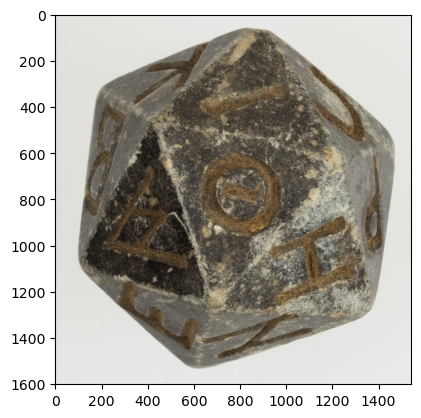

In [1]:
import os
import moncarlo

## Help Docs (4)

Show your docstring documentation by applying `help()` to your imported module.

- All methods have a docstring (3; .25 each).
- All classes have a docstring (1; .33 each).

In [2]:
help(moncarlo.moncarlo)

Help on module moncarlo.moncarlo in moncarlo:

NAME
    moncarlo.moncarlo

CLASSES
    builtins.object
        MonCarloAnalyzer
        MonCarloDevice
        MonCarloGame
    
    class MonCarloAnalyzer(builtins.object)
     |  MonCarloAnalyzer(game)
     |  
     |  Purpose/Action:
     |      Takes the results of a single MonCarloGame
     |      computes descriptive statistical properties about it.
     |      
     |  Input:
     |      - one game object createa with the MonCarloGame class
     |      
     |  Methods:
     |      __init__:
     |          game object as input parameter
     |          
     |      jackpot: (all faces of all devices are the same)
     |          - takes no additional parameters
     |          - computes how many times the game resulted in a jackpot
     |          - returns an integer 
     |      
     |      facecounts_per_roll:
     |          - computes how many times a given face is rolled in each event
     |          - returns a pandas dat

## `README.md` File (3)

Provide link to the README.md file of your project's repo.

- Metadata section or info present (1).
- Synopsis section showing how each class is called (1). (All must be included.)
- API section listing all classes and methods (1). (All must be included.)

URL:https://github.com/virginia-vrb9e/DS5100-project-repo/blob/main/README.md

## Successful installation (2)

Put a screenshot or paste a copy of a terminal session where you successfully install your module with pip.

If pasting text, use a preformatted text block to show the results.

- Installed with `pip` (1).
- Successfully installed message appears (1).

# Scenarios

Use code blocks to perform the tasks for each scenario.

Be sure the outputs are visible before submitting.

## Scenario 1: A 2-headed Coin (9)

Task 1. Create a fair coin (with faces $H$ and $T$) and one unfair coin in which one of the faces has a weight of $5$ and the others $1$.

- Fair coin created (1).
- Unfair coin created with weight as specified (1).

In [10]:
import numpy as np
import pandas as pd
from moncarlo import MonCarloDevice

a = np.array(['H', 'T'])
fair_coin = MonCarloDevice(a)

<class 'numpy.ndarray'>
yes, this is an np.ndarray!
check ok.
check ok.


In [15]:
unfair_coin = MonCarloDevice(a)
unfair_coin.change_facewt('H', 5)

<class 'numpy.ndarray'>
yes, this is an np.ndarray!
check ok.
check ok.
check okay: that face exists.
check okay: that face exists.


TypeError: 'DataFrame' object is not callable

Task 2. Play a game of $1000$ flips with two fair dice.

- Play method called correclty and without error (1).

Task 3. Play another game (using a new Game object) of $1000$ flips, this time using two unfair dice and one fair die. For the second unfair die, you can use the same die object twice in the list of dice you pass to the Game object.

- New game object created (1).
- Play method called correclty and without error (1).

Task 4. For each game, use an Analyzer object to determine the raw frequency of jackpots — i.e. getting either all $H$s or all $T$s.

- Analyzer objecs instantiated for both games (1).
- Raw frequencies reported for both (1).

Task 5. For each analyzer, compute relative frequency as the number of jackpots over the total number of rolls.

- Both relative frequencies computed (1).

Task 6. Show your results, comparing the two relative frequencies, in a simple bar chart.

- Bar chart plotted and correct (1).

## Scenario 2: A 6-sided Die (9)

Task 1. Create three dice, each with six sides having the faces 1 through 6.

- Three die objects created (1).

Task 2. Convert one of the dice to an unfair one by weighting the face $6$ five times more than the other weights (i.e. it has weight of 5 and the others a weight of 1 each).

- Unfair die created with proper call to weight change method (1).

Task 3. Convert another of the dice to be unfair by weighting the face $1$ five times more than the others.

- Unfair die created with proper call to weight change method (1).

Task 4. Play a game of $10000$ rolls with $5$ fair dice.

- Game class properly instantiated (1). 
- Play method called properly (1).

Task 5. Play another game of $10000$ rolls, this time with $2$ unfair dice, one as defined in steps #2 and #3 respectively, and $3$ fair dice.

- Game class properly instantiated (1). 
- Play method called properly (1).

Task 6. For each game, use an Analyzer object to determine the relative frequency of jackpots and show your results, comparing the two relative frequencies, in a simple bar chart.

- Jackpot methods called (1).
- Graph produced (1).

## Scenario 3: Letters of the Alphabet (7)

Task 1. Create a "die" of letters from $A$ to $Z$ with weights based on their frequency of usage as found in the data file `english_letters.txt`. Use the frequencies (i.e. raw counts) as weights.

- Die correctly instantiated with source file data (1).
- Weights properly applied using weight setting method (1).

Task 2. Play a game involving $4$ of these dice with $1000$ rolls.

- Game play method properly called (1).

Task 3. Determine how many permutations in your results are actual English words, based on the vocabulary found in `scrabble_words.txt`.

- Use permutation method (1).
- Get count as difference between permutations and vocabulary (1).

Task 4. Repeat steps #2 and #3, this time with $5$ dice. How many actual words does this produce? Which produces more?

- Successfully repreats steps (1).
- Identifies parameter with most found words (1).